In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from itables import show

In [2]:
# Constants
PROCESSED_DATA_DIR = os.path.join("../data/processed", "final_NCR")
# PROCESSED_DATA_DIR = os.path.join("../data/processed", "final")

In [3]:
# Auxiliar functions


def _get_df_info(df, df_name):
    print(f"------------------------ {df_name} ------------------------")
    df.info(verbose=True, show_counts=True)
    print(
        f"\nREGISTROS NÃO REPETIDOS: {df.drop_duplicates().shape[0]} de {df.shape[0]}\n"
    )

In [9]:
# Open data
final_total_total_data = pd.read_csv(
    os.path.join(PROCESSED_DATA_DIR, "final_total_total_data_without_nan.csv"),
    delimiter=";",
)
final_total_total_data_fun = pd.read_csv(
    os.path.join(PROCESSED_DATA_DIR, "final_total_total_data_fun_without_nan.csv"),
    delimiter=";",
)
final_total_total_data_med = pd.read_csv(
    os.path.join(PROCESSED_DATA_DIR, "final_total_total_data_med_without_nan.csv"),
    delimiter=";",
)

In [10]:
# Check some basic info about the data
_get_df_info(final_total_total_data, "final_total_total_data")
# _get_df_info(final_total_total_data_fun, 'final_total_total_data_fun')
# _get_df_info(final_total_total_data_med, 'final_total_total_data_med')

------------------------ final_total_total_data ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33501 entries, 0 to 33500
Data columns (total 209 columns):
 #    Column                                              Non-Null Count  Dtype  
---   ------                                              --------------  -----  
 0    UF_CODE                                             33501 non-null  int64  
 1    CO_MUNICIPIO                                        33501 non-null  int64  
 2    TXT_FUN_TX_PROMOCAO_TOTAL                           33501 non-null  float64
 3    TXT_FUN_TX_PROMOCAO_ANOS_INICIAIS                   33501 non-null  float64
 4    TXT_FUN_TX_PROMOCAO_ANOS_FINAIS                     33501 non-null  float64
 5    TXT_FUN_TX_PROMOCAO_PRIMEIRO                        33501 non-null  float64
 6    TXT_FUN_TX_PROMOCAO_SEGUNDO                         33501 non-null  float64
 7    TXT_FUN_TX_PROMOCAO_TERCEIRO                        33501 non-null  float

In [11]:
# Check the type of the columns
print(final_total_total_data.dtypes.value_counts())

float64    204
int64        5
Name: count, dtype: int64


In [12]:
# Missing Data DataFrame

df_missing = pd.DataFrame(
    {
        "Feature": final_total_total_data.columns,
        "Missing": final_total_total_data.isnull().sum(),
    }
)
df_missing["Percentage"] = (df_missing["Missing"] / len(final_total_total_data)) * 100
df_missing.sort_values(by="Percentage", ascending=False, inplace=True)

columns_with_missing_data = df_missing[df_missing["Percentage"] != 0][
    "Feature"
].tolist()
print("Dados de evasão foram perdidos? ", "EVASAO" in columns_with_missing_data)
print(
    f"{len(columns_with_missing_data)} columns with missing data: {columns_with_missing_data}"
)


show(df_missing)

Dados de evasão foram perdidos?  False
0 columns with missing data: []


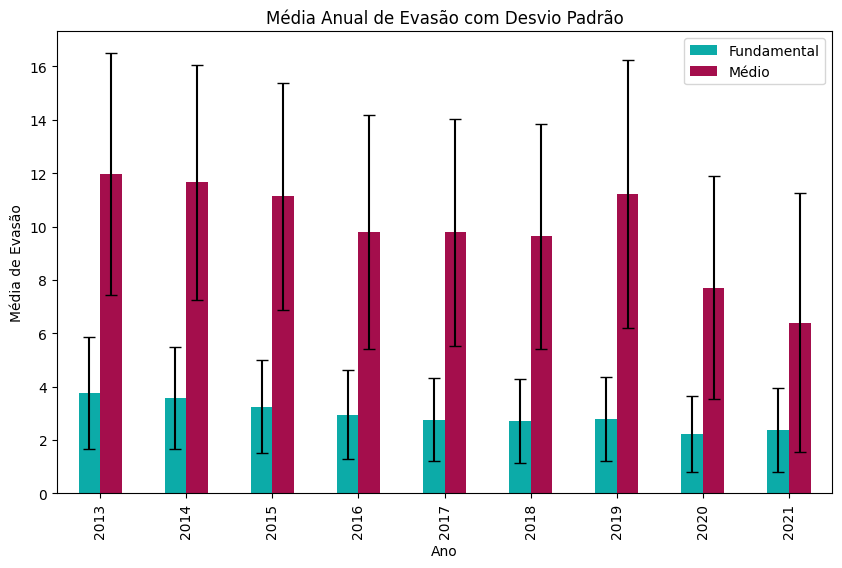

In [13]:
FUN_COLOR = "#0CABA8"
MED_COLOR = "#A40E4C"
EVASAO_FUN = "TXT_FUN_TX_EVASAO_TOTAL"
EVASAO_MED = "TXT_MED_TX_EVASAO_TOTAL"

# Agrupar os dados pela coluna "ANO" e calcular a média e o desvio padrão das colunas de evasão
grouped_data = final_total_total_data.groupby("ANO")[[EVASAO_FUN, EVASAO_MED]].agg(
    ["mean", "std"]
)

# Separar as médias e os desvios padrão
means = grouped_data.xs("mean", level=1, axis=1)
stds = grouped_data.xs("std", level=1, axis=1)

# Plotar o gráfico de barras com as médias anuais e barras de erro
fig, ax = plt.subplots(figsize=(10, 6))
means.plot(kind="bar", yerr=stds, ax=ax, capsize=4, color=[FUN_COLOR, MED_COLOR])
ax.set_xlabel("Ano")
ax.set_ylabel("Média de Evasão")
ax.set_title("Média Anual de Evasão com Desvio Padrão")
plt.legend(["Fundamental", "Médio"])
plt.show()

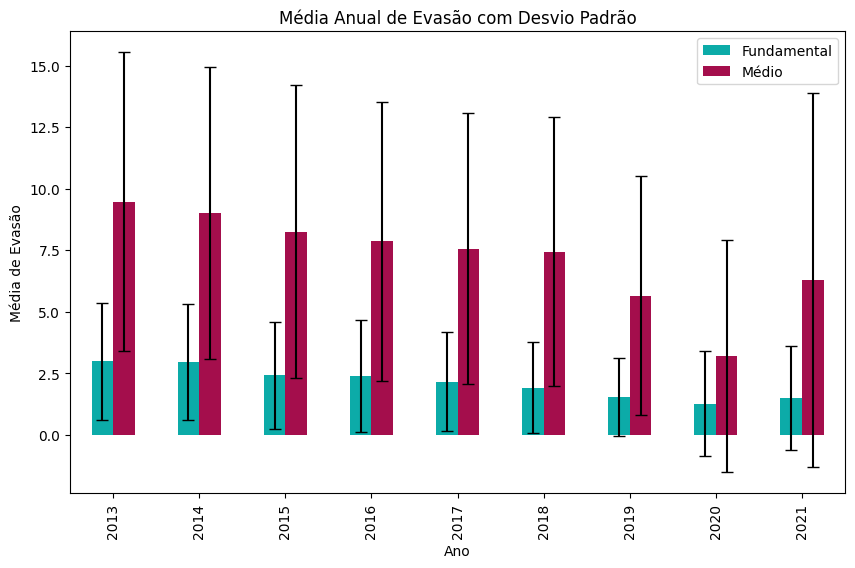

In [14]:
FUN_COLOR = "#0CABA8"
MED_COLOR = "#A40E4C"


# Agrupar os dados pela coluna "ANO" e calcular a média das colunas "TXT_MED_TX_EVASAO_TOTAL" e "TXT_FUN_TX_EVASAO_TOTAL"
grouped_data = final_total_total_data.groupby("ANO")[
    ["TXR_FUN_TX_ABANDONO_TOTAL", "TXR_MED_TX_ABANDONO_TOTAL"]
].agg(["mean", "std"])

# Separar as médias e os desvios padrão
means = grouped_data.xs("mean", level=1, axis=1)
stds = grouped_data.xs("std", level=1, axis=1)

# Plotar o gráfico de barras com as médias anuais e barras de erro
fig, ax = plt.subplots(figsize=(10, 6))
means.plot(kind="bar", yerr=stds, ax=ax, capsize=4, color=[FUN_COLOR, MED_COLOR])
ax.set_xlabel("Ano")
ax.set_ylabel("Média de Evasão")
ax.set_title("Média Anual de Evasão com Desvio Padrão")
plt.legend(["Fundamental", "Médio"])
plt.show()

In [15]:
# Build a DataFrame with the basic metrics about the data
metrics_dict = {}

for df, df_name in [
    (final_total_total_data, "total"),
    (final_total_total_data_fun, "fun"),
    (final_total_total_data_med, "med"),
]:
    # Get basic metrics
    df_metrics = final_total_total_data.describe().round(2)

    # Add mode
    mode = final_total_total_data.mode().iloc[0]
    mode_df = pd.DataFrame(mode).transpose()
    mode_df.index = ["mode"]

    df_metrics = pd.concat([df_metrics, mode_df])

    metrics_dict[df_name] = df_metrics

show(metrics_dict["total"])

<Figure size 1000x600 with 0 Axes>

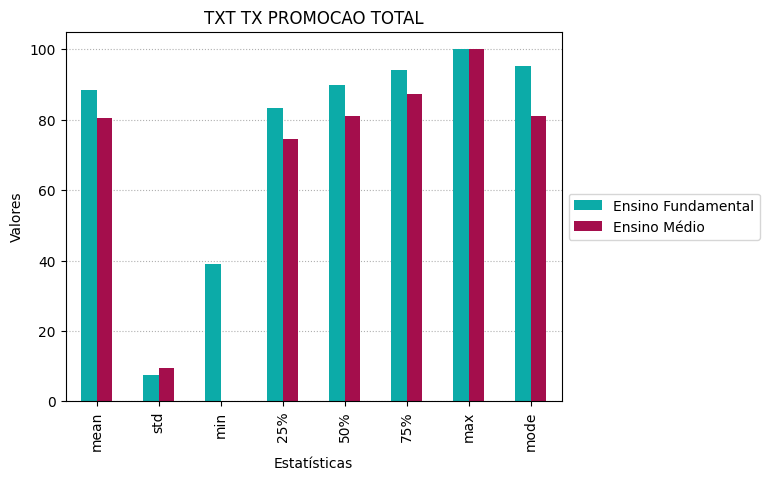

<Figure size 1000x600 with 0 Axes>

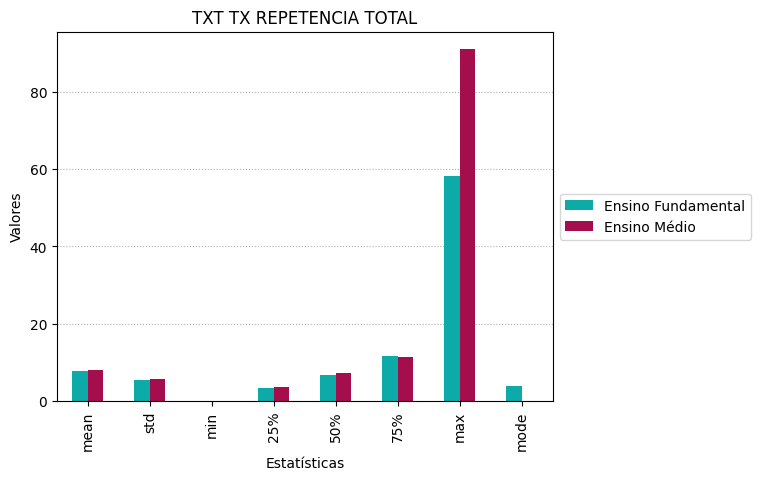

<Figure size 1000x600 with 0 Axes>

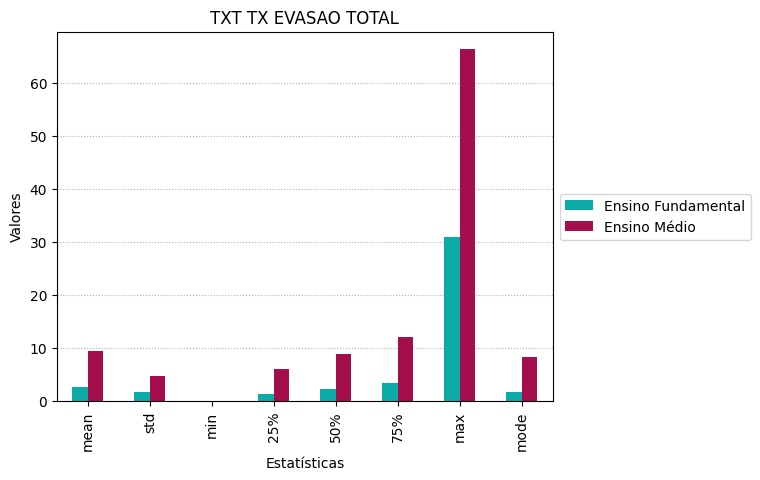

<Figure size 1000x600 with 0 Axes>

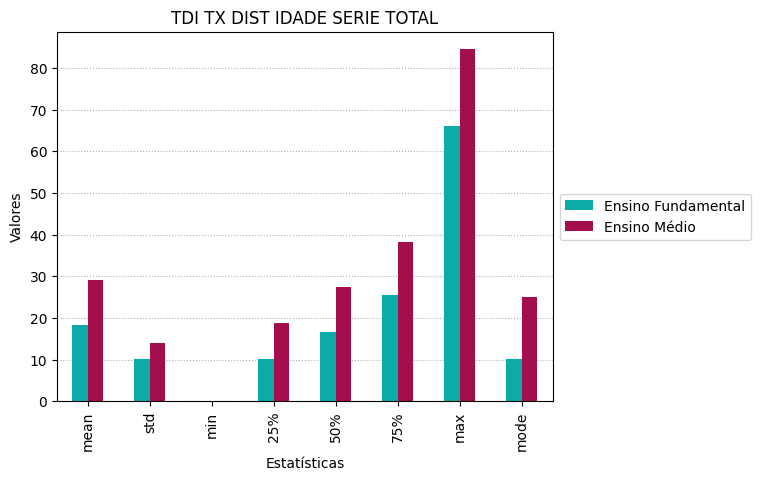

<Figure size 1000x600 with 0 Axes>

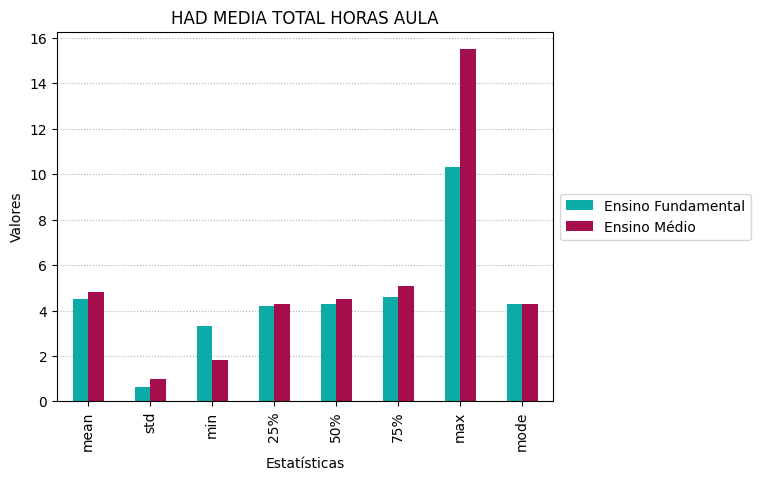

<Figure size 1000x600 with 0 Axes>

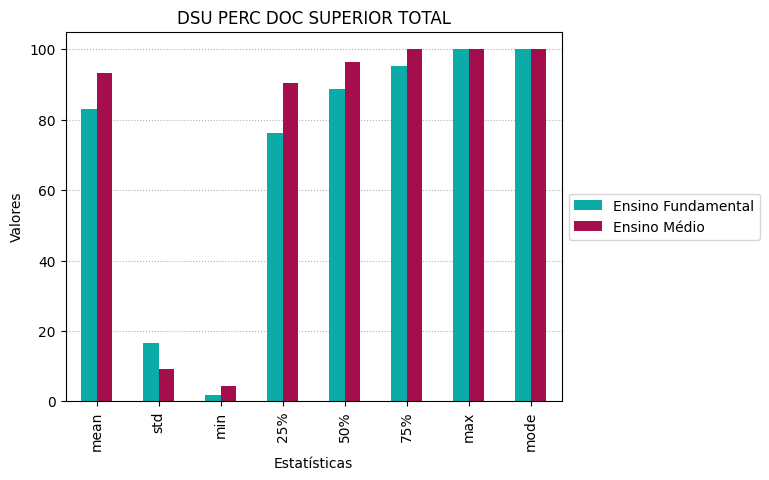

<Figure size 1000x600 with 0 Axes>

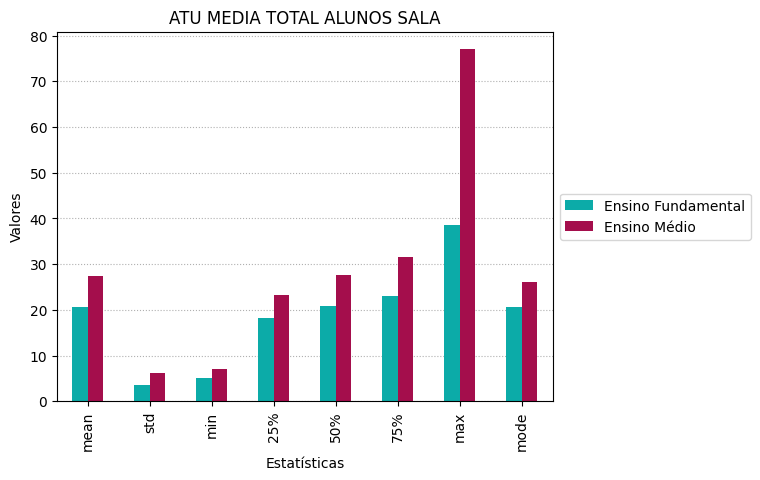

<Figure size 1000x600 with 0 Axes>

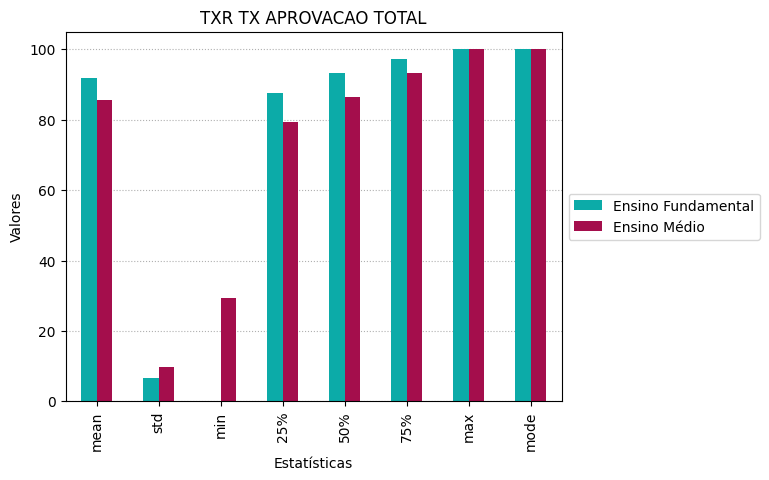

<Figure size 1000x600 with 0 Axes>

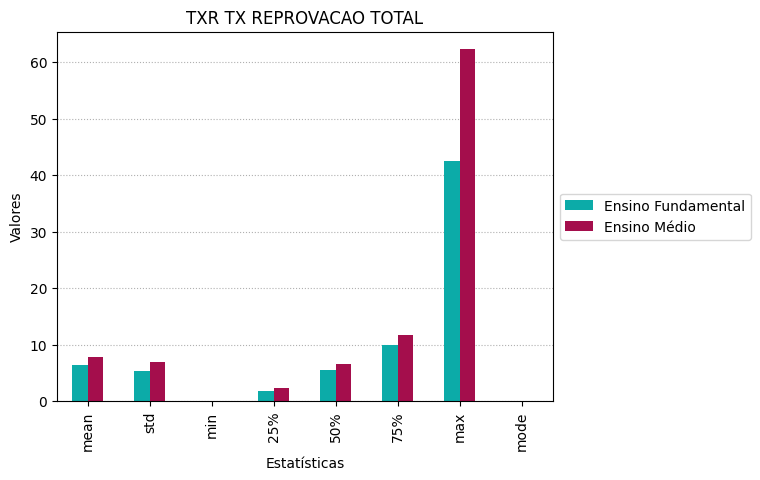

<Figure size 1000x600 with 0 Axes>

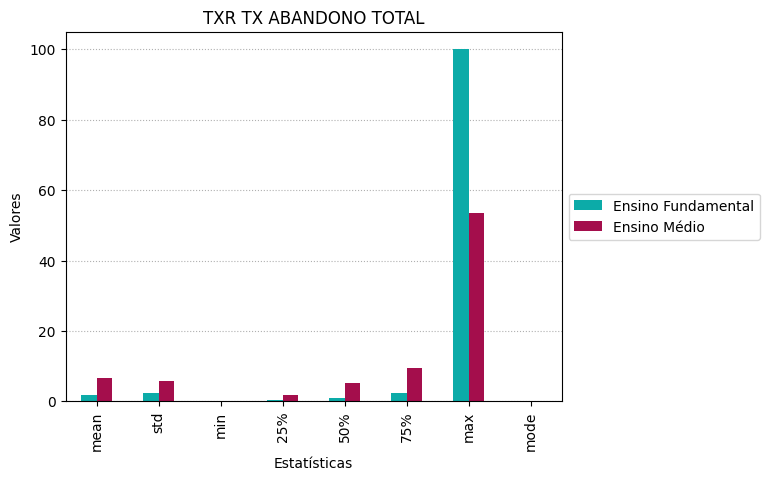

<Figure size 1000x600 with 0 Axes>

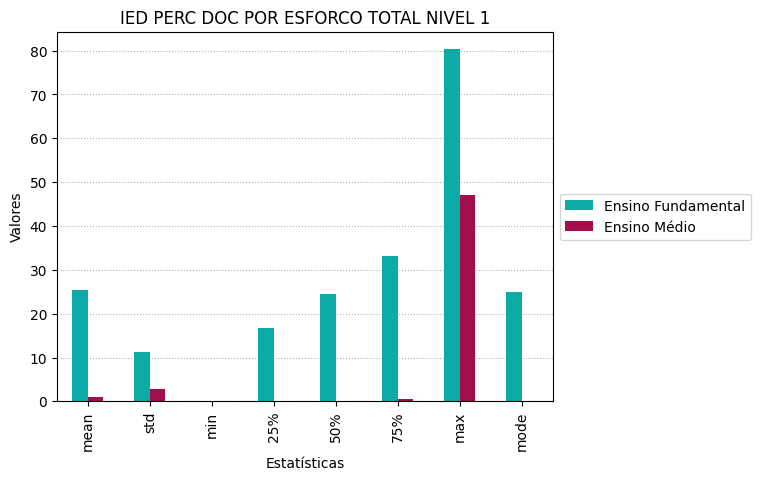

<Figure size 1000x600 with 0 Axes>

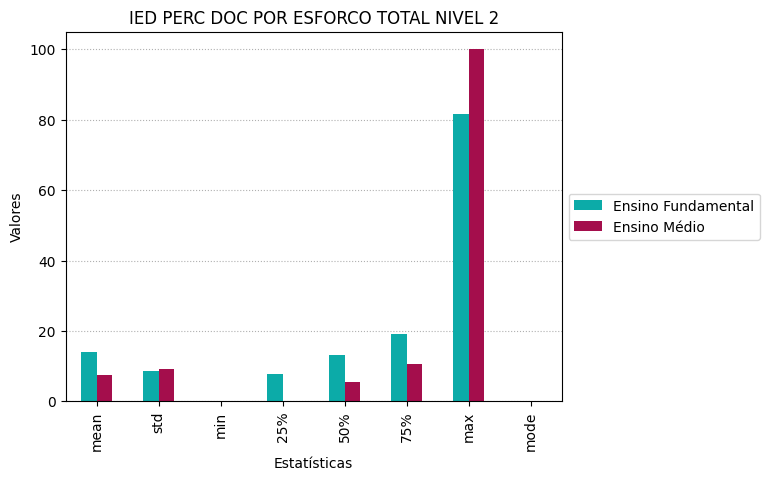

<Figure size 1000x600 with 0 Axes>

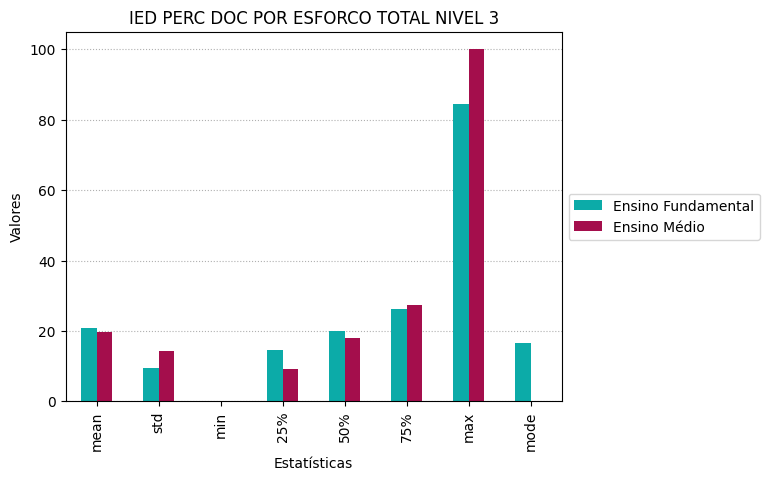

<Figure size 1000x600 with 0 Axes>

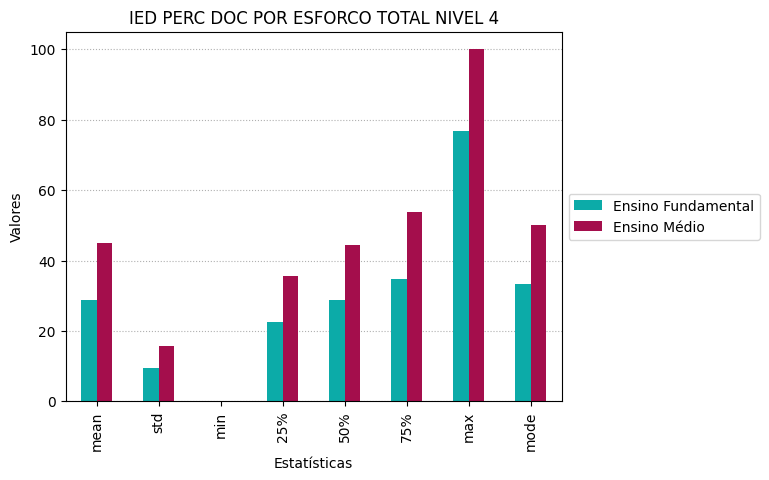

<Figure size 1000x600 with 0 Axes>

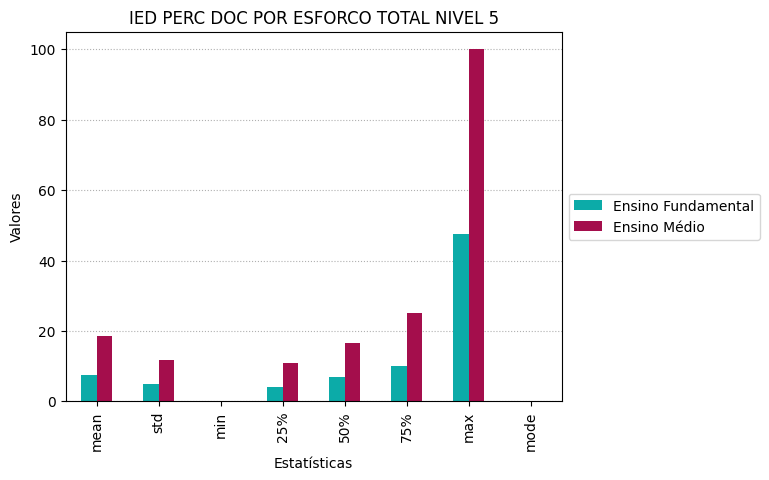

<Figure size 1000x600 with 0 Axes>

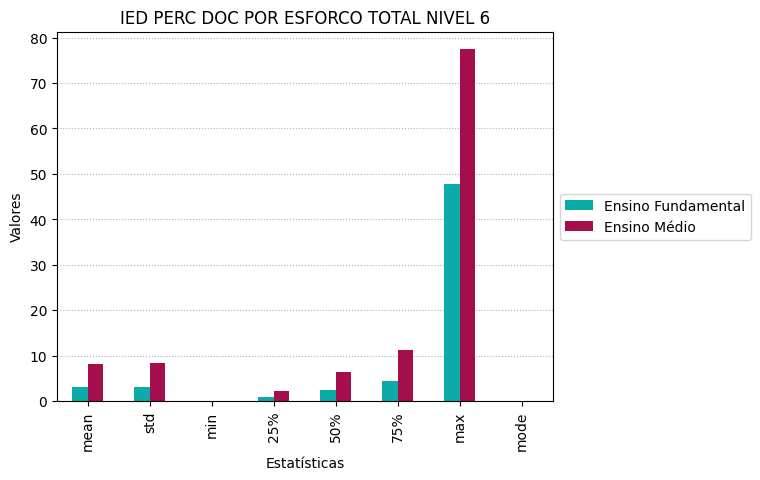

In [12]:
# Plot the metrics to compare the data from Fundamental and High School
FUN_COLOR = "#0CABA8"
MED_COLOR = "#A40E4C"


def _made_plot(col_fun, col_med):
    # Combine the describe results
    combined_describe_result = pd.concat(
        [metrics_dict["fun"][col_fun], metrics_dict["med"][col_med]], axis=1
    )
    combined_describe_result.drop(["count"], inplace=True)
    combined_describe_result.columns = [col_fun, col_med]

    # Plot the results
    plt.figure(figsize=(10, 6))
    combined_describe_result.plot(kind="bar", color=[FUN_COLOR, MED_COLOR])
    plt.title(col_fun.replace("FUN_", "").replace("_", " "))
    plt.xlabel("Estatísticas")
    plt.ylabel("Valores")
    plt.legend(
        ["Ensino Fundamental", "Ensino Médio"],
        loc="center left",
        bbox_to_anchor=(1, 0.5),
    )
    plt.gca().set_axisbelow(True)
    plt.gca().set_zorder(0)
    plt.grid(axis="y", linestyle="dotted", zorder=1)
    plt.show()


columns_fun = list(metrics_dict["fun"].columns.values)

for col_fun in columns_fun:
    if (
        "FUN" in col_fun
        and col_fun.replace("FUN", "MED") in metrics_dict["med"].columns
    ):
        _made_plot(col_fun, col_fun.replace("FUN", "MED"))

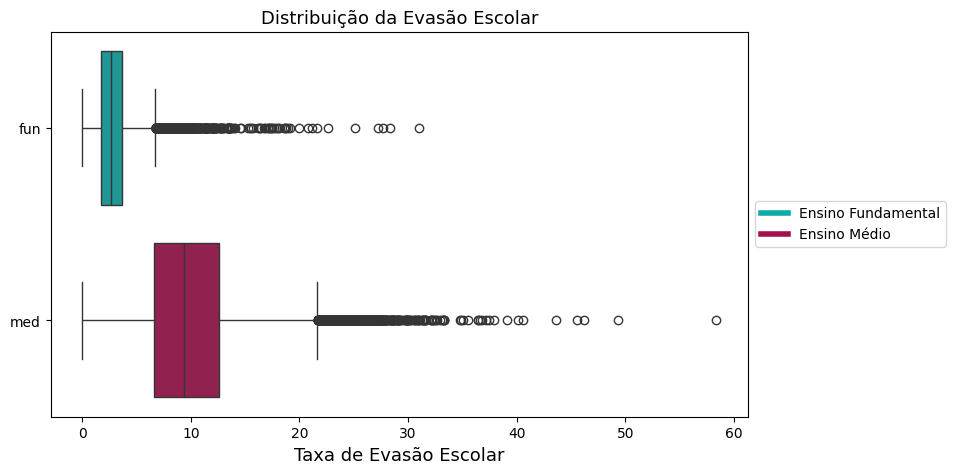

In [16]:
# Plot the distribution of the Evasão Escolar for Fundamental and High School
FUN_COLOR = "#0CABA8"
MED_COLOR = "#A40E4C"
EVASAO_FUN = "TXT_FUN_TX_EVASAO_TOTAL"
EVASAO_MED = "TXT_MED_TX_EVASAO_TOTAL"


fontsize = 13
plt.figure(figsize=(9, 5))
ax = sns.boxplot(
    data={
        "fun": final_total_total_data[EVASAO_FUN],
        "med": final_total_total_data[EVASAO_MED],
    },
    palette={"fun": FUN_COLOR, "med": MED_COLOR},
    orient="h",
)
plt.legend(
    handles=[
        plt.Line2D([0], [0], color=FUN_COLOR, lw=4, label="Ensino Fundamental"),
        plt.Line2D([0], [0], color=MED_COLOR, lw=4, label="Ensino Médio"),
    ],
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
ax.set_title("Distribuição da Evasão Escolar", fontsize=fontsize)
ax.set_xlabel("Taxa de Evasão Escolar", fontsize=fontsize)
plt.show()

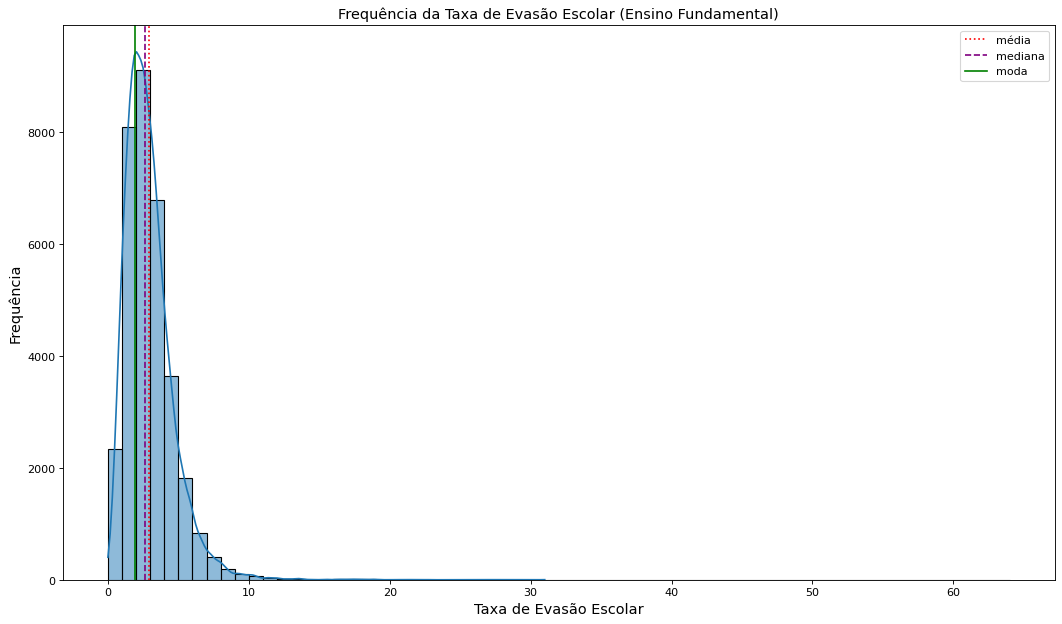

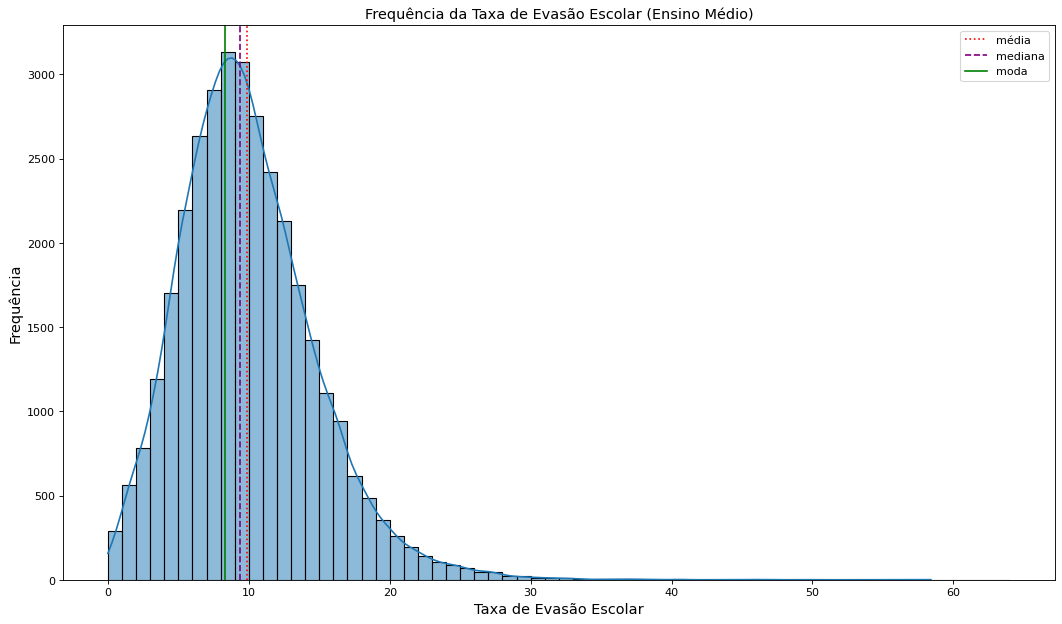

In [17]:
# Plot the histogram of some metrics about the Evasão Escolar for Fundamental and High School
for ev in [EVASAO_FUN, EVASAO_MED]:
    fig = plt.figure(figsize=(16, 9), dpi=80)
    ax = sns.histplot(
        final_total_total_data[ev], bins=range(0, 65, 1), stat="count", kde=True
    )
    ax.axvline(
        final_total_total_data[ev].mean(),
        color="red",
        label="média",
        linestyle="dotted",
    )
    ax.axvline(
        final_total_total_data[ev].median(),
        color="purple",
        label="mediana",
        linestyle="dashed",
    )
    ax.axvline(final_total_total_data[ev].mode()[0], color="green", label="moda")
    ax.set_title(
        f'Frequência da Taxa de Evasão Escolar ({"Ensino Médio" if "MED" in ev else "Ensino Fundamental"})',
        fontsize=fontsize,
    )
    ax.set_xlabel("Taxa de Evasão Escolar", fontsize=fontsize)
    ax.set_ylabel("Frequência", fontsize=fontsize)
    plt.legend()
    plt.show()

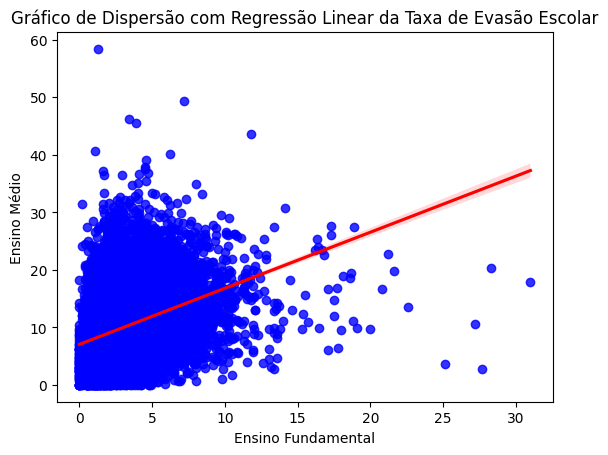

In [18]:
# Make a scatter plot with a linear regression line to compare the Evasão Escolar between Fundamental and High School
sns.regplot(
    x=EVASAO_FUN,
    y=EVASAO_MED,
    data=final_total_total_data,
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.xlabel("Ensino Fundamental")
plt.ylabel("Ensino Médio")
plt.title("Gráfico de Dispersão com Regressão Linear da Taxa de Evasão Escolar")
plt.show()

In [19]:
# Generate the correlation matrix
correlation_matrix = final_total_total_data.corr()
# show(correlation_matrix)

In [27]:
show(correlation_matrix[EVASAO_FUN].sort_values(ascending=False))

In [21]:
show(correlation_matrix[EVASAO_MED].sort_values(ascending=False))

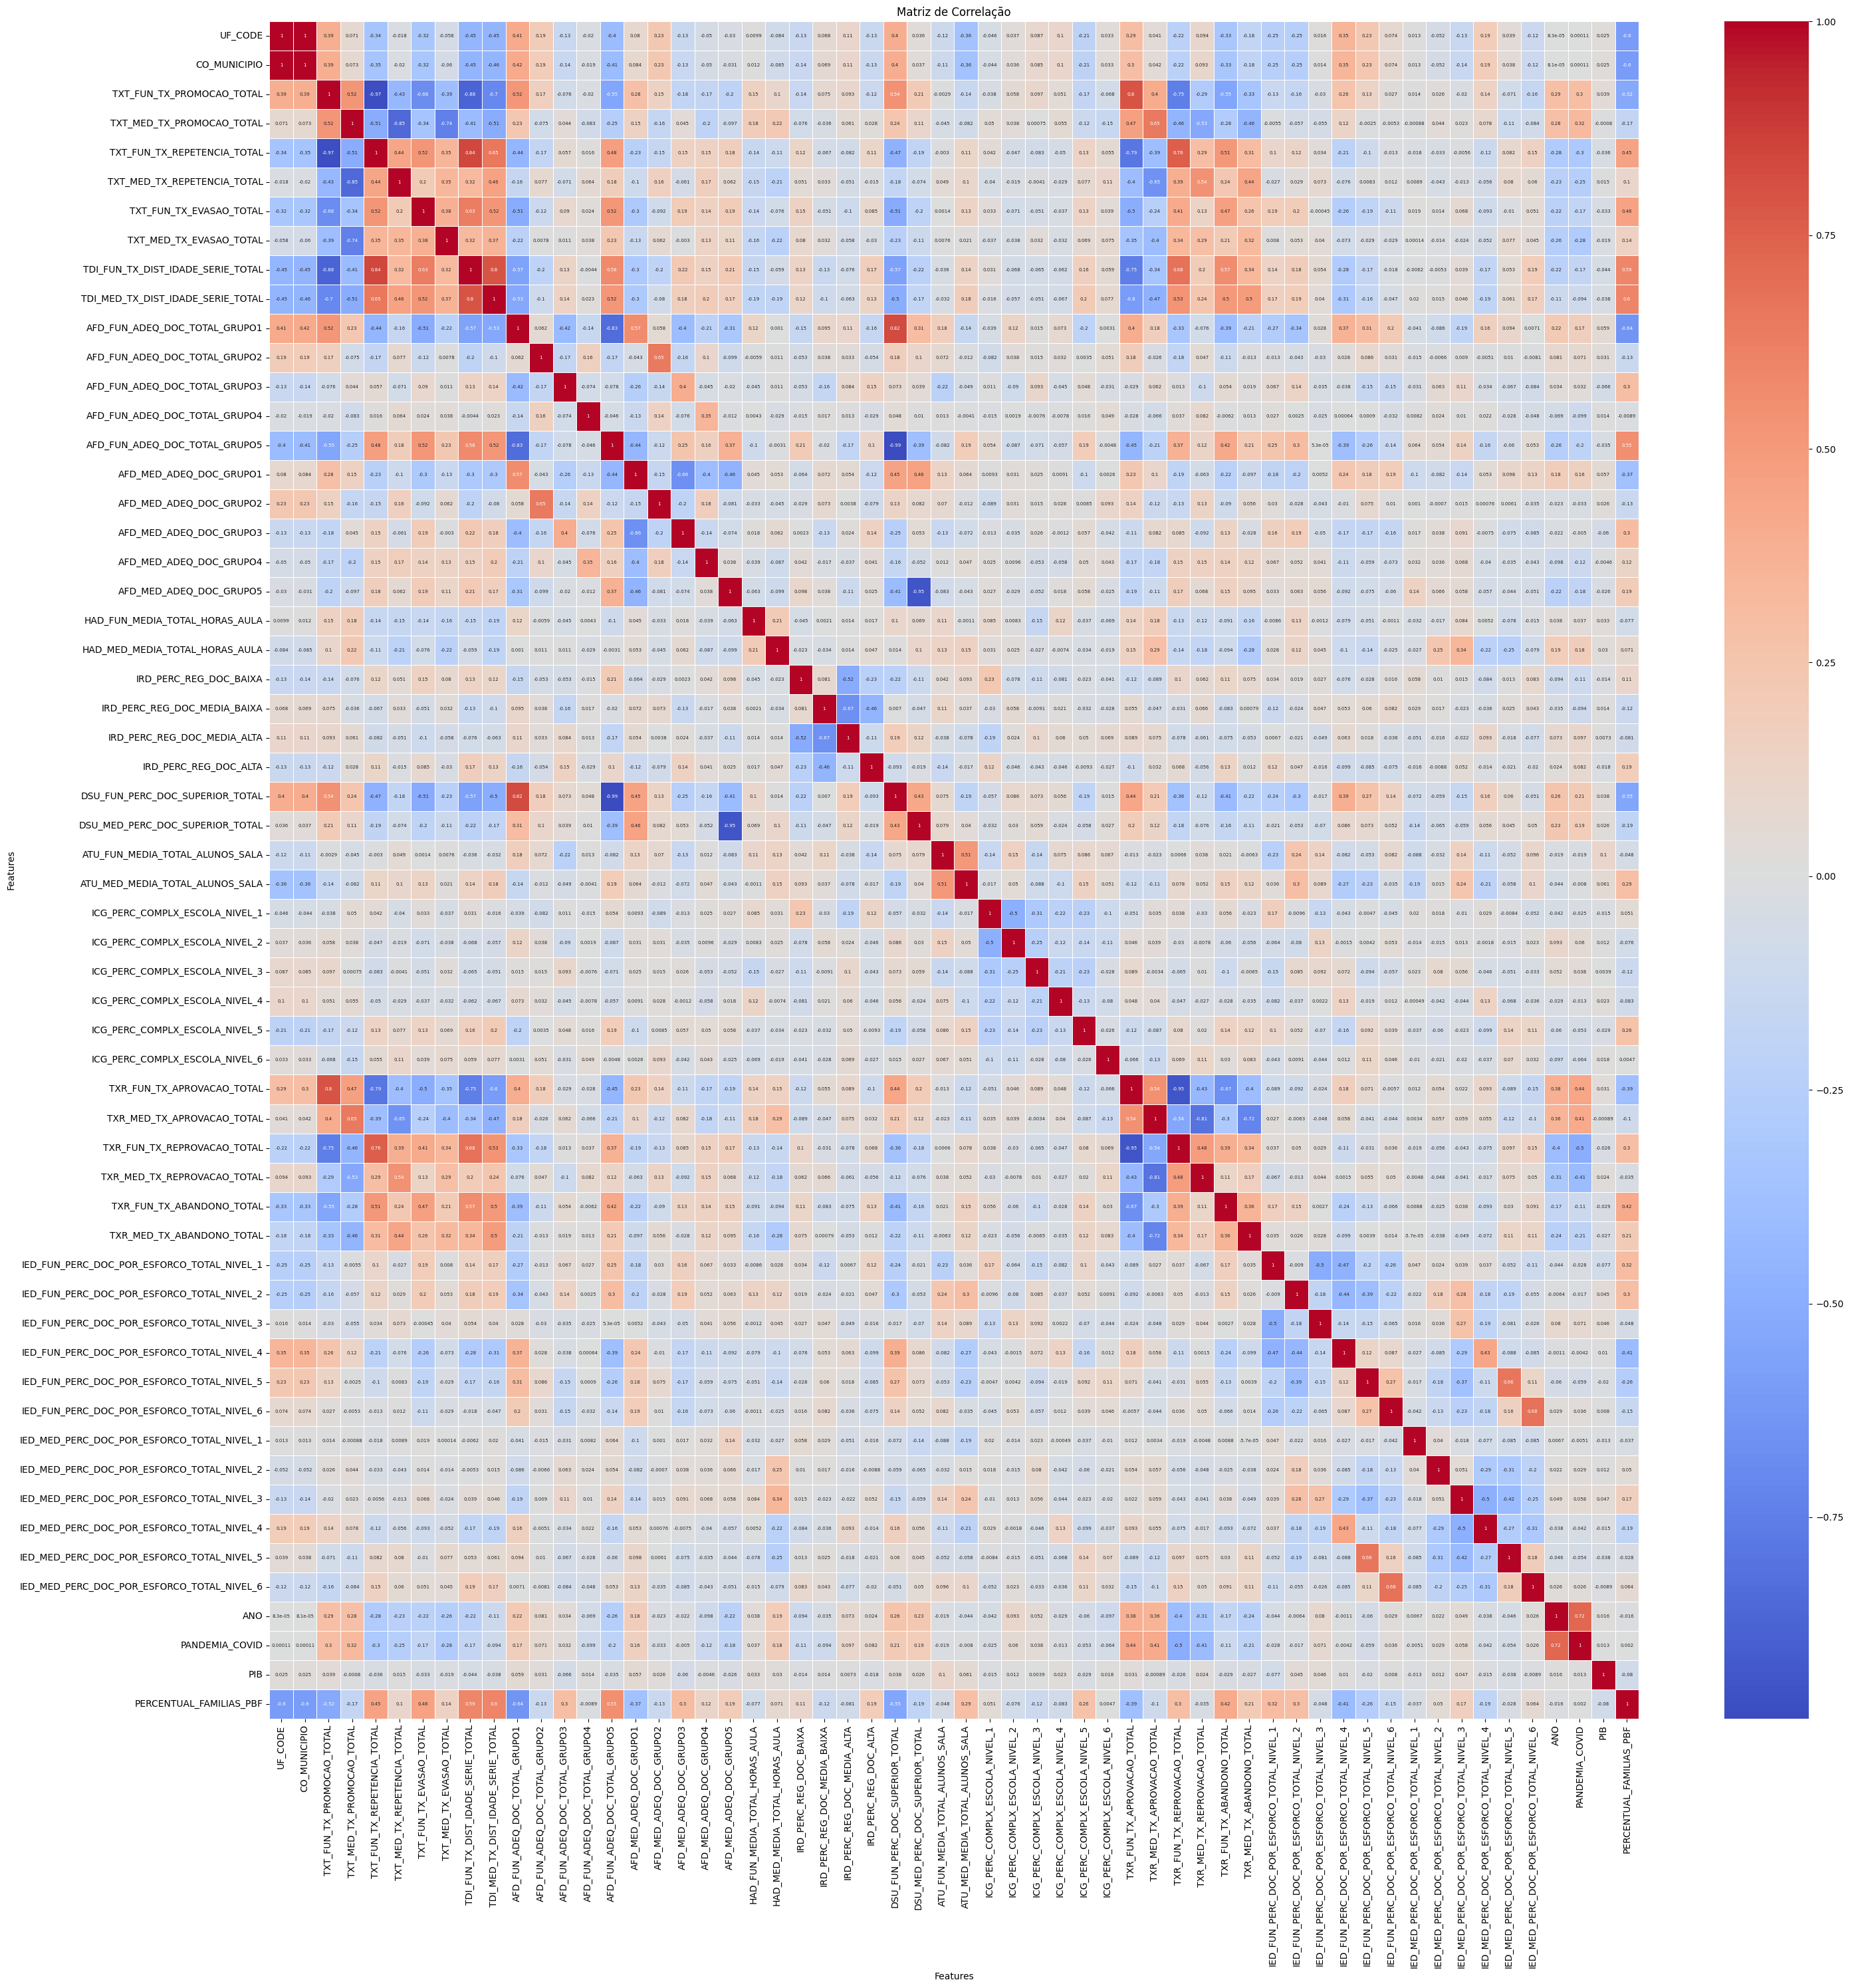

In [42]:
# Plot the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 5},
)
plt.title("Matriz de Correlação")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()

plt.show()

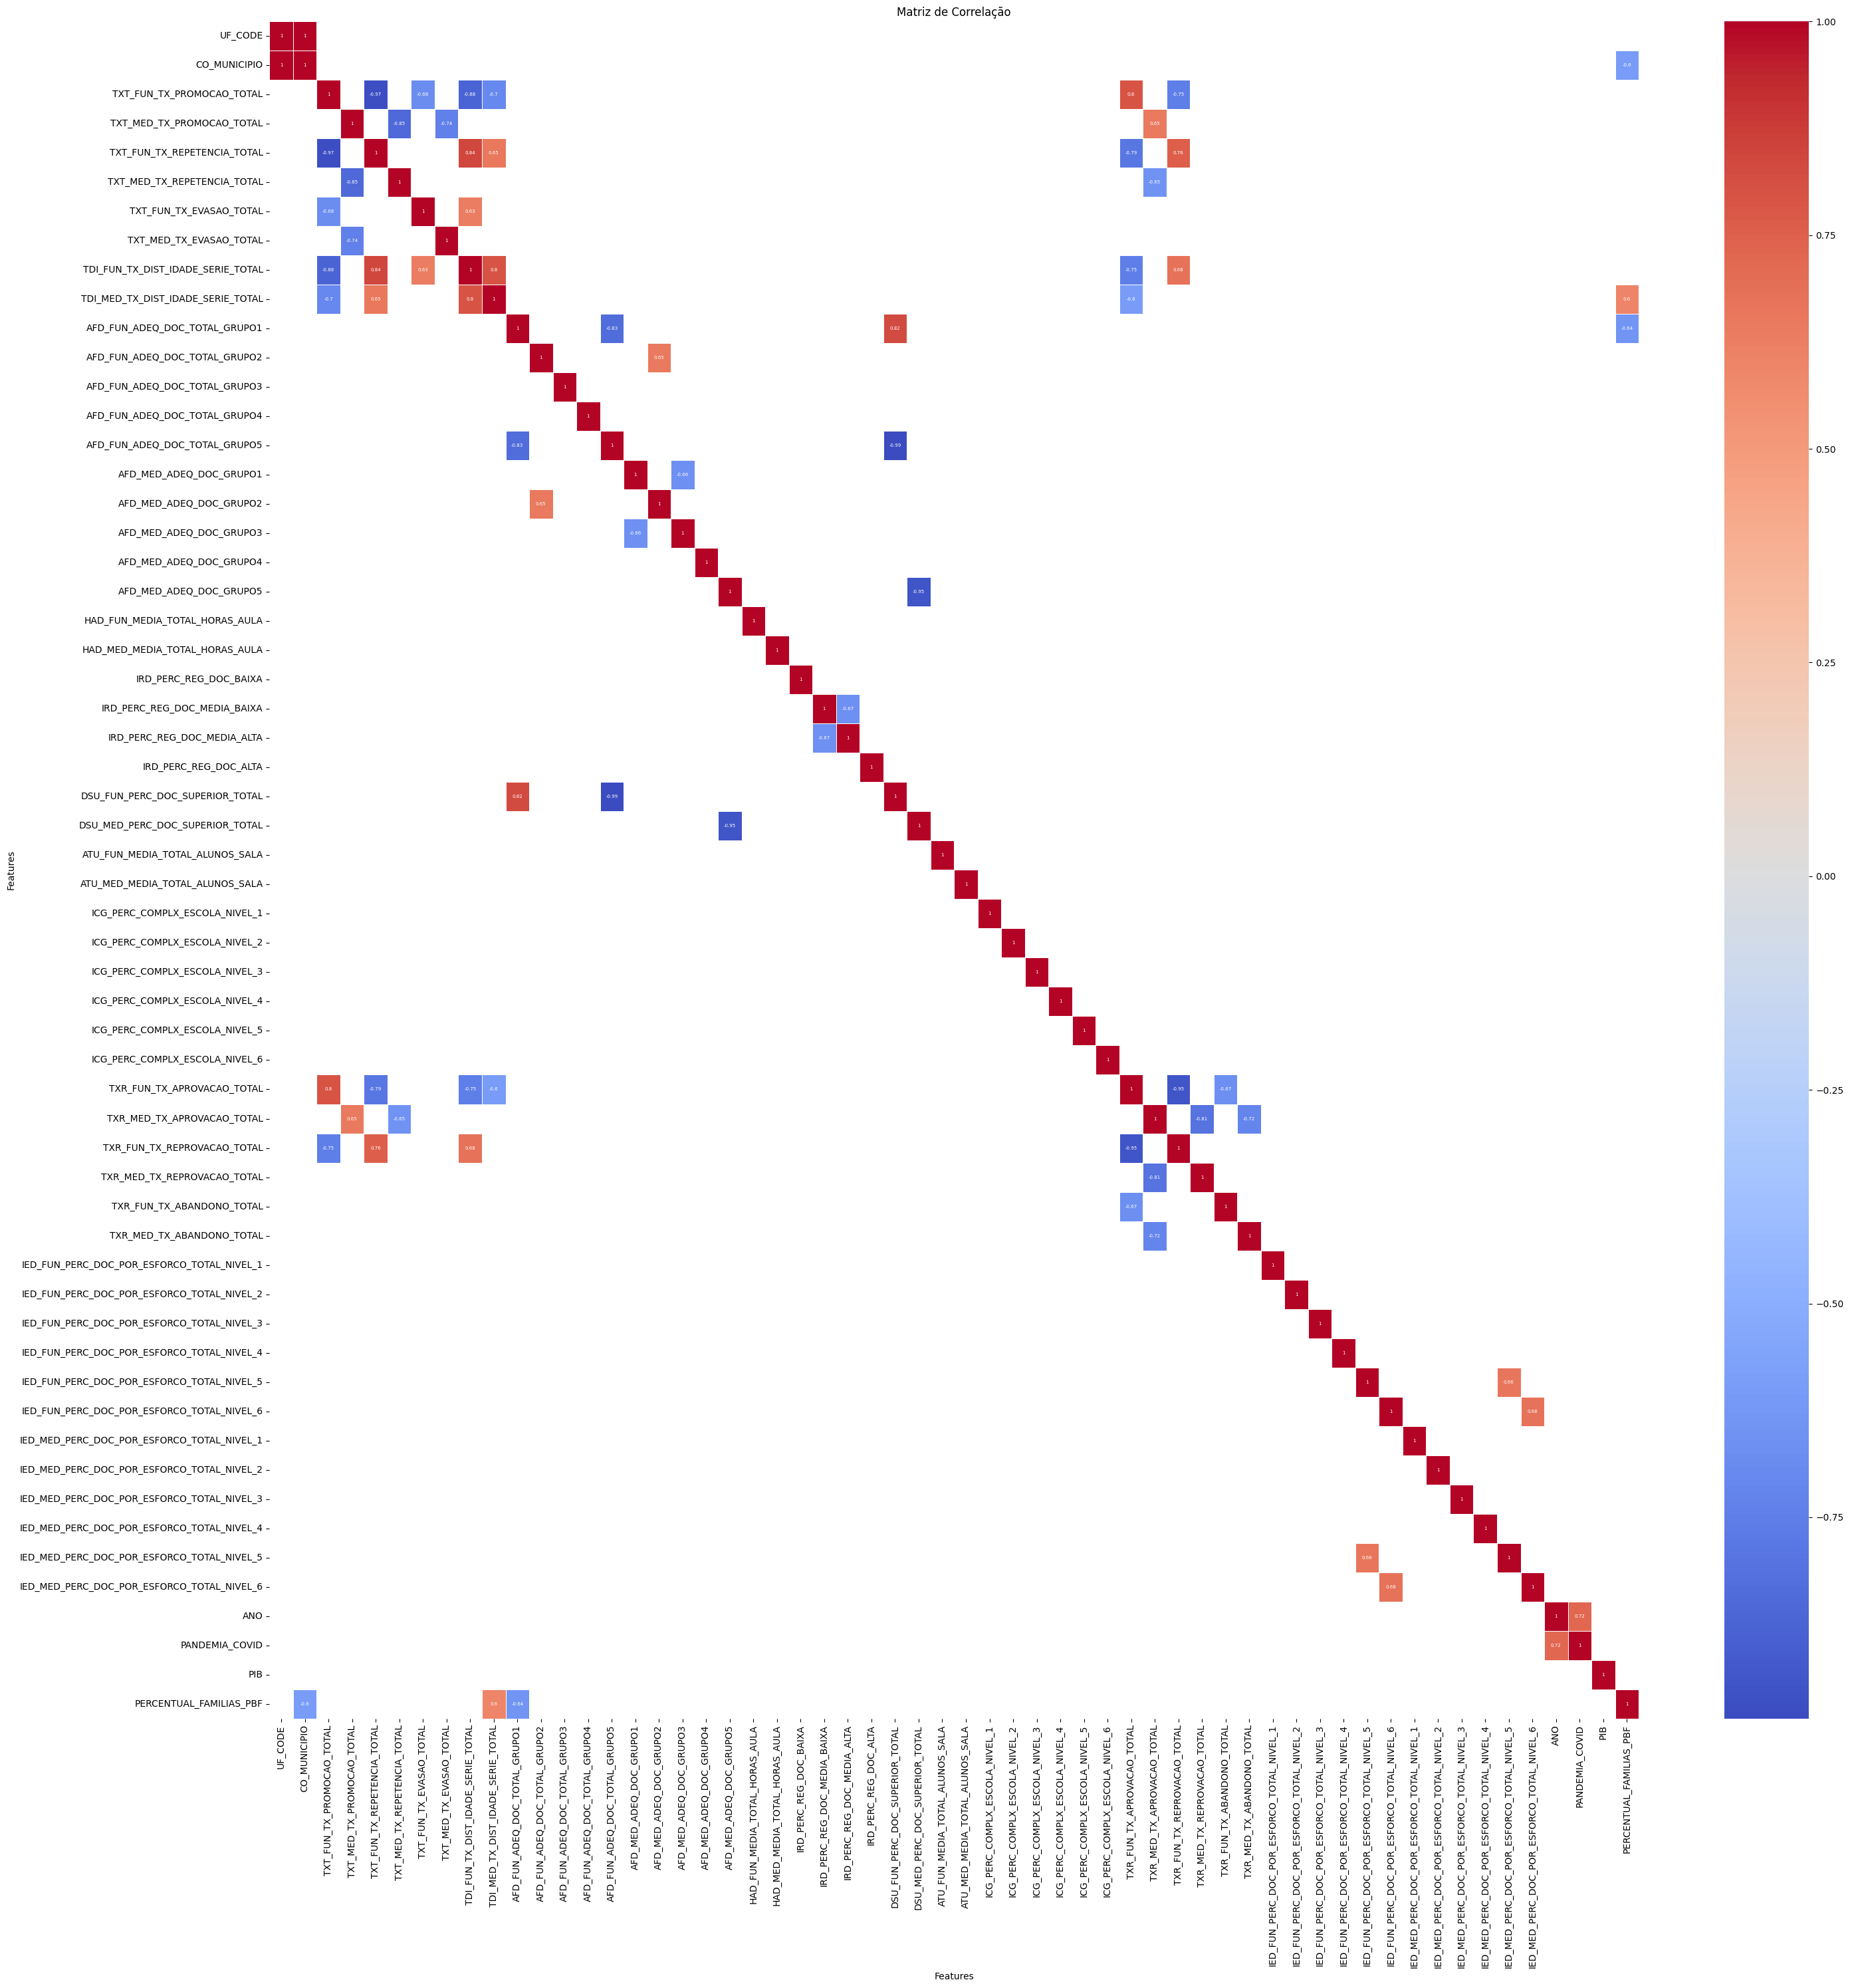

In [43]:
# Plot the correlation matrix with a threshold
filtered_correlation_matrix = correlation_matrix.mask(correlation_matrix.abs() <= 0.6)

plt.figure(figsize=(30, 30))
sns.heatmap(
    filtered_correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 5},
)
plt.title("Matriz de Correlação")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()

plt.show()

Dataset size: 179x179


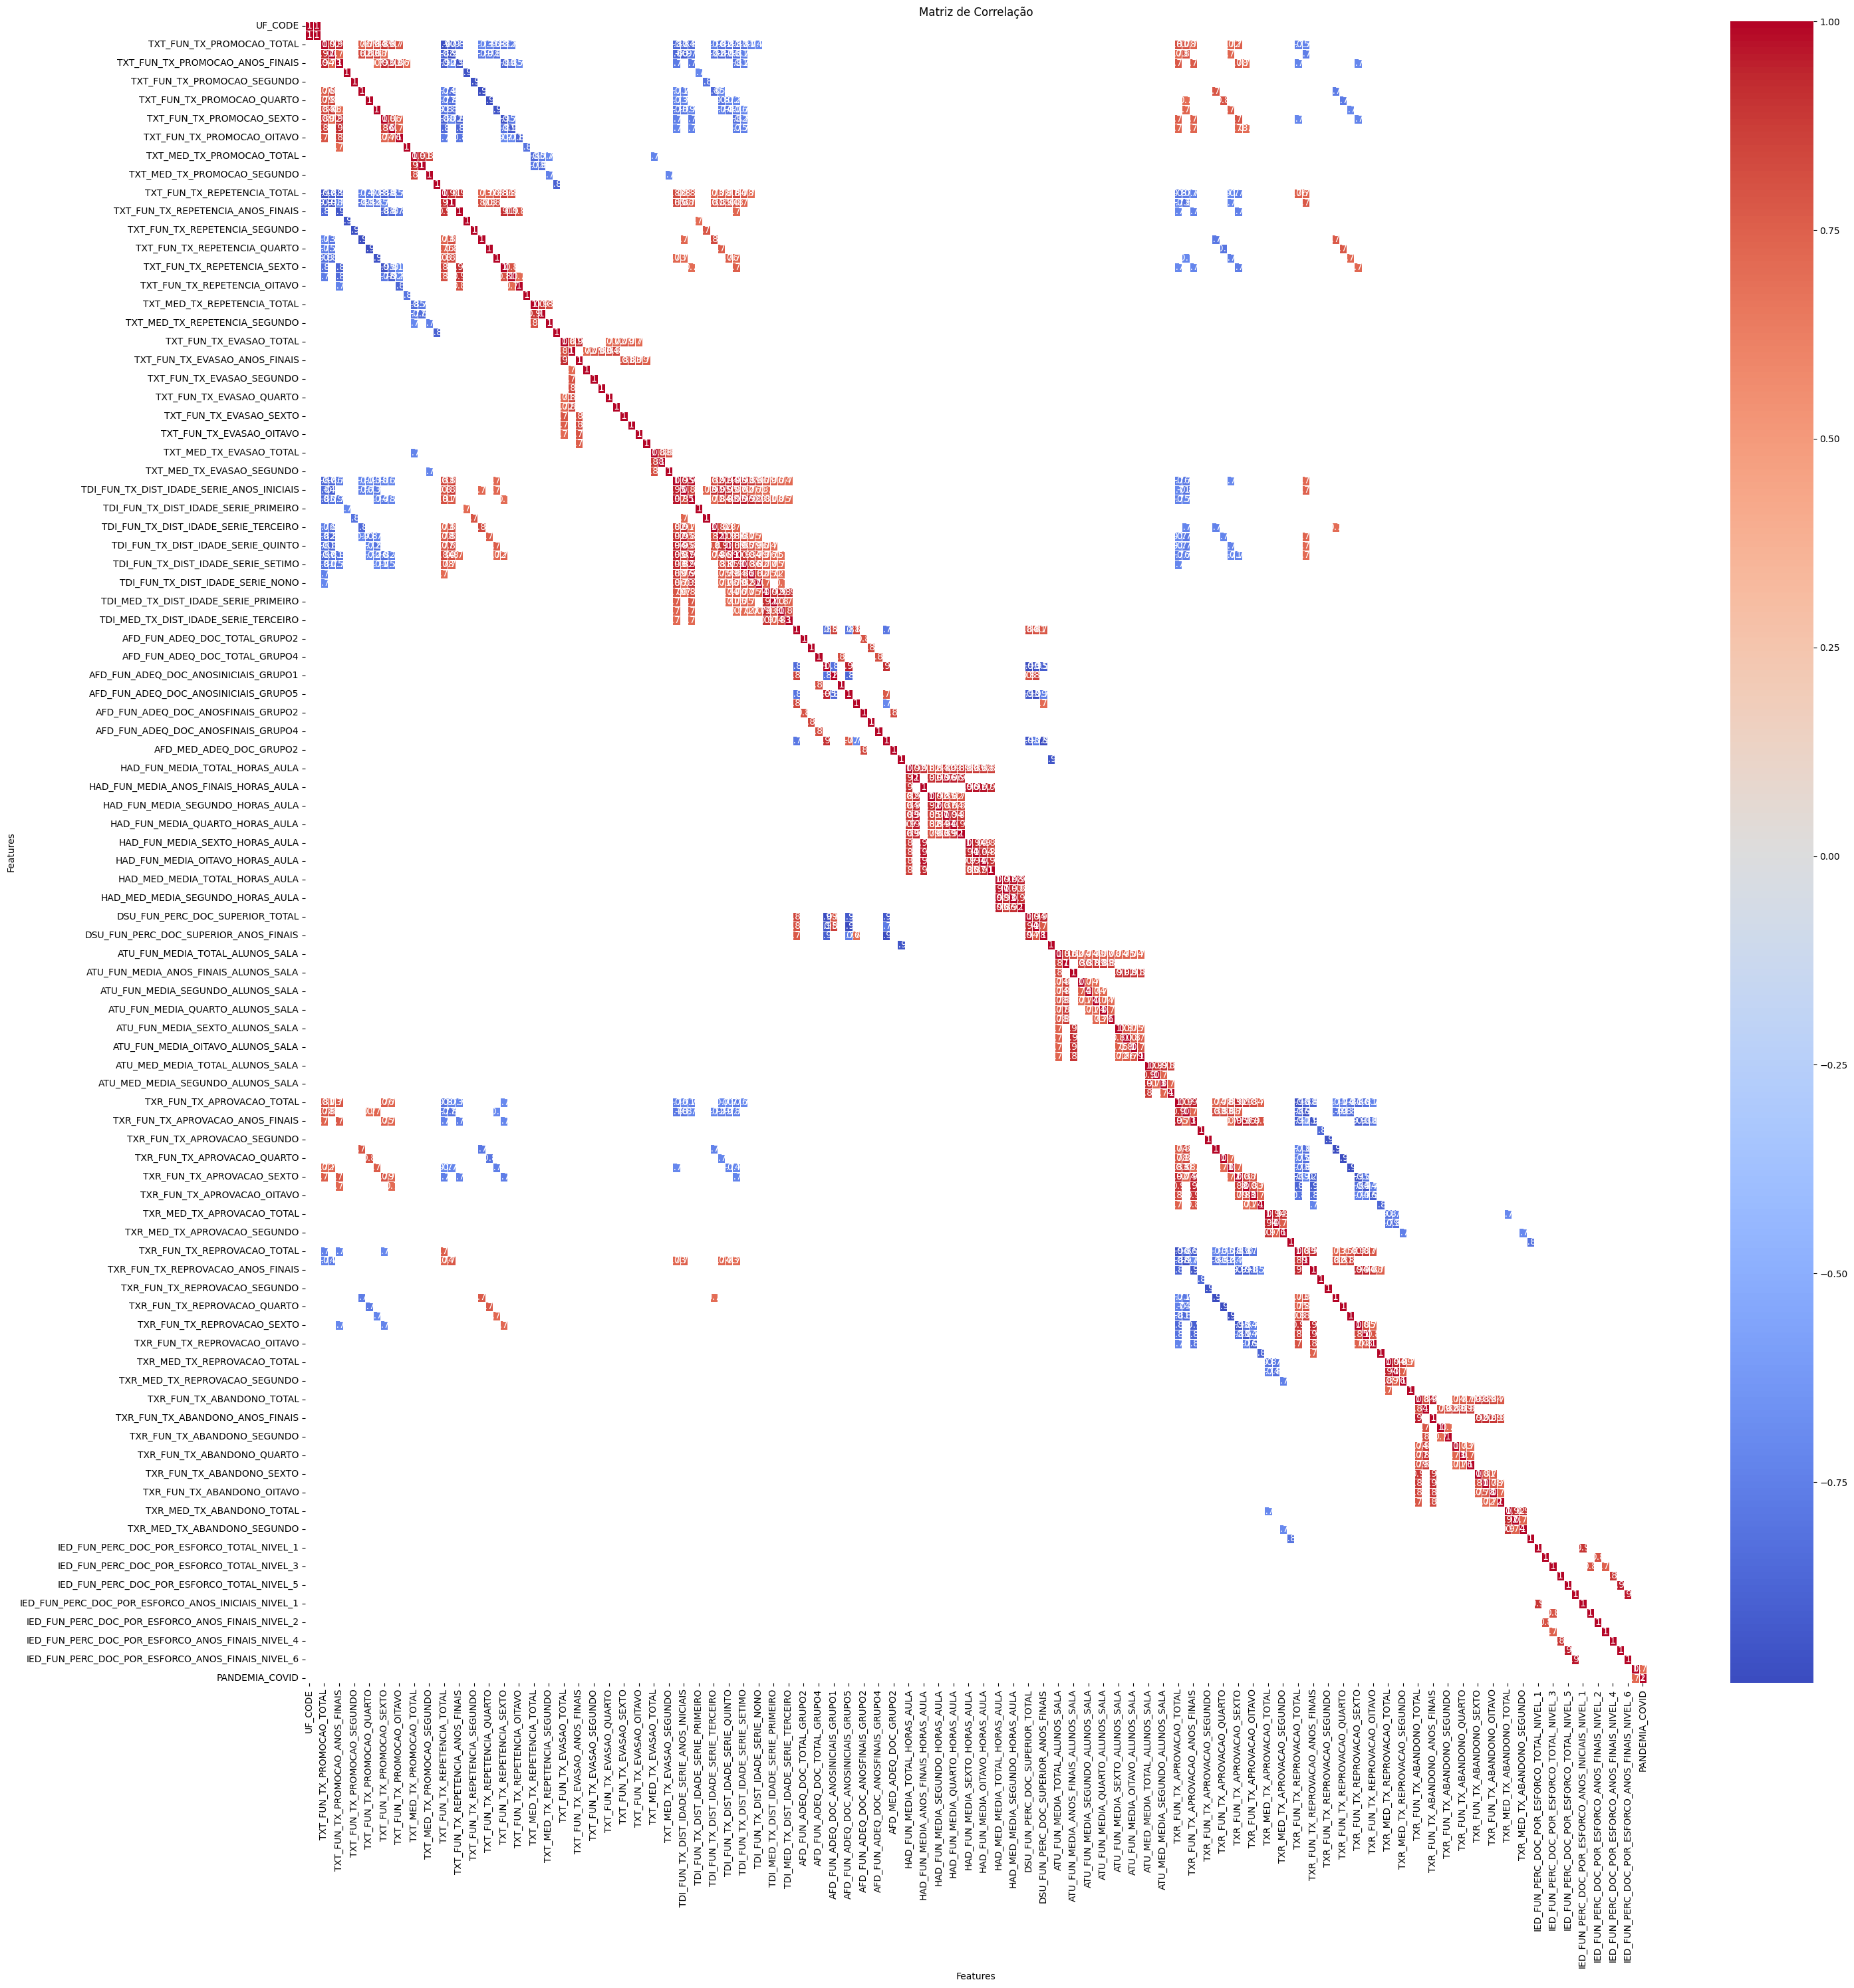

In [26]:
# Plot the correlation matrix with a threshold
THRESHOLD = 0.7

thresholded_correlation_matrix = correlation_matrix[
    (correlation_matrix > THRESHOLD) | (correlation_matrix < (-THRESHOLD))
]

np.fill_diagonal(thresholded_correlation_matrix.values, np.nan)
thresholded_correlation_matrix.dropna(axis=0, how="all", inplace=True)
thresholded_correlation_matrix.dropna(axis=1, how="all", inplace=True)
np.fill_diagonal(thresholded_correlation_matrix.values, 1)


num_rows, num_columns = thresholded_correlation_matrix.shape
print(f"Dataset size: {num_rows}x{num_columns}")

plt.figure(figsize=(30, 30))
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
sns.heatmap(thresholded_correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()

plt.show()